In [59]:
import math
import pandas
import numpy
import math
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Summary of findings
# To load a data set we need to import pandas library first
# There are small differences from code in the Plan of Attack vs Python 3 version
# When importing data set, the Address is OK with blanks in between
# Nominal data is classified into groups that cannot be ordered or ranked
# Numerical data consists of numbers generated by some type of measurement and is continuous
# All features/variables are numeric, there aren't nominal features in the dataset 
# Very easy to check for Null values
# Is more convenient to change Demograpics columns to Ordinary names to more easily read the Histograms
# When printing the dataset an additional counter column is added by default, starting count at "0"

In [ ]:
# Observations made throughout the analysis
# DATA CLEANING
# There aren´t NULL values 
# DATA TRANSFORMATION
# There aren´t NA/NULL values 
# Regarding negative bill amounts (columns X12 - X17) --> 12% of bills are negative which is significative  
# By definition A negative balance indicates that your bill was overpaid and that you may be eligible for a refund
# About negative payment amounts (columns X18 - X23) 20% of payments are negative 
# This means accounts not being paid as agreed
# Hence making the decision to keep those records in the dataset 
# Thera are 2 data changes 
# 1. Change headers to make it easier to work with columns (X6 - X23) 
# 2. Change colums position to easier read the data (X6 - X11 means Sep to Apr), so rearrenging X11 to X6, ABR TO SET
# DATA REDUCTION or DISCRETIZATION
# Correlation Matrix - Remove redundant and irrelevant features without incurring much loss of information (Low Variance / High Correlation )
# One of the most influential data preprocessing tasks in data mining
# Discretization is considered a data reduction mechanism because it diminishes data from a large domain of numeric values to a subset of categorical values
# Prepare dataset for corr matrix and plot heat map
# 80% of consumers go from 21 to 42 years old 
# Focus on Universitary Men from 21 to 42 years old, this is where the most defaulter are present 

In [ ]:
# Future Recomendations
# interesting fact: We know 60% of the credits are approved for Woman, then more Absolute defaulters are ladies (3763)
# however if we look at WOMEN default rate (3763/14349) = 26.2% vs MEN default rate (2873/9015)= 31.9% then MEN are
# worst payers than WOMEN by a 5%
# less effective payers are from 23 to 30 years old

In [ ]:
# Import and Prepare the Data 

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [6]:
credit = pd.read_csv('C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\default of credit card clients.csv', header =1)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-6-755704d2efab>, line 1)

In [11]:
# There are small differences from code in the Plan of Attack vs Python 3 version
# When importing data set, the Address is OK with blanks in between 
credit = pd.read_csv (r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\default of credit card clients.csv', header =1)

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.describe()
# All features are numeric, there aren't nominal features in the data set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Very easy to check for Null values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
credit.count()
#Counts non NA/NULL values 

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [ ]:
# DATA TRANSFORMATION
# Rename Columns

In [12]:
# Iterating the columns - Current Colums
for col in credit.columns: 
    print(col) 

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


In [13]:
# Iterating the columns - NEW Columns Name
creditv2 = credit.rename(columns= {'PAY_0': 'PAY_STATUS_SEP', 
                                   'PAY_2': 'PAY_STATUS_AGO', 
                                   'PAY_3': 'PAY_STATUS_JUL', 
                                   'PAY_4': 'PAY_STATUS_JUN', 
                                   'PAY_5': 'PAY_STATUS_MAY', 
                                   'PAY_6': 'PAY_STATUS_ABR',
                                   'BILL_AMT1': 'BILL_AMT_SET',
                                   'BILL_AMT2': 'BILL_AMT_AGO',
                                   'BILL_AMT3': 'BILL_AMT_JUL',
                                   'BILL_AMT4': 'BILL_AMT_JUN',
                                   'BILL_AMT5': 'BILL_AMT_MAY',
                                   'BILL_AMT6': 'BILL_AMT_ABR',
                                   'PAY_AMT1': 'PAY_AMT_SET',
                                   'PAY_AMT2': 'PAY_AMT_AGO',
                                   'PAY_AMT3': 'PAY_AMT_JUL',
                                   'PAY_AMT4': 'PAY_AMT_JUN',
                                   'PAY_AMT5': 'PAY_AMT_MAY',
                                   'PAY_AMT6': 'PAY_AMT_ABR',})
for col in creditv2.columns: 
    print(col) 

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_STATUS_SEP
PAY_STATUS_AGO
PAY_STATUS_JUL
PAY_STATUS_JUN
PAY_STATUS_MAY
PAY_STATUS_ABR
BILL_AMT_SET
BILL_AMT_AGO
BILL_AMT_JUL
BILL_AMT_JUN
BILL_AMT_MAY
BILL_AMT_ABR
PAY_AMT_SET
PAY_AMT_AGO
PAY_AMT_JUL
PAY_AMT_JUN
PAY_AMT_MAY
PAY_AMT_ABR
default payment next month


In [17]:
for col in creditv2.columns: 
    print(col, end=' , ')

ID , LIMIT_BAL , SEX , EDUCATION , MARRIAGE , AGE , PAY_STATUS_SEP , PAY_STATUS_AGO , PAY_STATUS_JUL , PAY_STATUS_JUN , PAY_STATUS_MAY , PAY_STATUS_ABR , BILL_AMT_SET , BILL_AMT_AGO , BILL_AMT_JUL , BILL_AMT_JUN , BILL_AMT_MAY , BILL_AMT_ABR , PAY_AMT_SET , PAY_AMT_AGO , PAY_AMT_JUL , PAY_AMT_JUN , PAY_AMT_MAY , PAY_AMT_ABR , default payment next month , 

In [14]:
# Change columns positions
# just assign the column names in the order you want them
creditv3 = creditv2[['ID' , 'LIMIT_BAL' , 'SEX' , 'EDUCATION' , 'MARRIAGE' , 'AGE' , 
'PAY_STATUS_ABR' , 'PAY_STATUS_MAY', 'PAY_STATUS_JUN' , 'PAY_STATUS_JUL' , 'PAY_STATUS_AGO' , 'PAY_STATUS_SEP' ,
'BILL_AMT_ABR' , 'BILL_AMT_MAY' , 'BILL_AMT_JUN' , 'BILL_AMT_JUL' , 'BILL_AMT_AGO' , 'BILL_AMT_SET' ,
'PAY_AMT_ABR' , 'PAY_AMT_MAY' , 'PAY_AMT_JUN' , 'PAY_AMT_JUL' , 'PAY_AMT_AGO' , 'PAY_AMT_SET' , 'default payment next month' ]]

for col in creditv3.columns: 
    print(col) 

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_STATUS_ABR
PAY_STATUS_MAY
PAY_STATUS_JUN
PAY_STATUS_JUL
PAY_STATUS_AGO
PAY_STATUS_SEP
BILL_AMT_ABR
BILL_AMT_MAY
BILL_AMT_JUN
BILL_AMT_JUL
BILL_AMT_AGO
BILL_AMT_SET
PAY_AMT_ABR
PAY_AMT_MAY
PAY_AMT_JUN
PAY_AMT_JUL
PAY_AMT_AGO
PAY_AMT_SET
default payment next month


In [22]:
creditv3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,...,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET,default payment next month
0,1,20000,2,2,1,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,1
1,2,120000,2,2,2,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,4,50000,2,2,1,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,5,50000,1,2,1,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,0


In [15]:
# DATA DISCRETIZATION
# Prepare dataset for corr matrix and plot heat map
# requires to drop columns for demographics + repayment status + default payment next month
creditv4 = creditv3[['BILL_AMT_ABR' , 'BILL_AMT_MAY' , 'BILL_AMT_JUN' , 'BILL_AMT_JUL' , 'BILL_AMT_AGO' , 'BILL_AMT_SET' ,
'PAY_AMT_ABR' , 'PAY_AMT_MAY' , 'PAY_AMT_JUN' , 'PAY_AMT_JUL' , 'PAY_AMT_AGO' , 'PAY_AMT_SET']]

for col in creditv4.columns: 
    print(col) 

BILL_AMT_ABR
BILL_AMT_MAY
BILL_AMT_JUN
BILL_AMT_JUL
BILL_AMT_AGO
BILL_AMT_SET
PAY_AMT_ABR
PAY_AMT_MAY
PAY_AMT_JUN
PAY_AMT_JUL
PAY_AMT_AGO
PAY_AMT_SET


In [25]:
creditv4.corr()

,BILL_AMT_ABR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET
BILL_AMT_ABR,1.000000,0.946197,0.900941,0.853320,0.831594,0.802650,0.115494,0.307729,0.250237,0.233770,0.172663,0.199965
BILL_AMT_MAY,0.946197,1.000000,0.940134,0.883910,0.859778,0.829779,0.164184,0.141574,0.293118,0.252305,0.181246,0.217031
BILL_AMT_JUN,0.900941,0.940134,1.000000,0.923969,0.892482,0.860272,0.177637,0.160433,0.130191,0.300023,0.207564,0.233012
BILL_AMT_JUL,0.853320,0.883910,0.923969,1.000000,0.928326,0.892279,0.182326,0.179712,0.143405,0.130011,0.316936,0.244335
BILL_AMT_AGO,0.831594,0.859778,0.892482,0.928326,1.000000,0.951484,0.174256,0.157957,0.147398,0.150718,0.100851,0.280365
BILL_AMT_SET,0.802650,0.829779,0.860272,0.892279,0.951484,1.000000,0.179341,0.167026,0.158303,0.156887,0.099355,0.140277
PAY_AMT_ABR,0.115494,0.164184,0.177637,0.182326,0.174256,0.179341,1.000000,0.154896,0.157834,0.162740,0.157634,0.185735
PAY_AMT_MAY,0.307729,0.141574,0.160433,0.179712,0.157957,0.167026,0.154896,1.000000,0.151830,0.159214,0.180908,0.148459
PAY_AMT_JUN,0.250237,0.293118,0.130191,0.143405,0.147398,0.158303,0.157834,0.151830,1.000000,0.216325,0.180107,0.199558
PAY_AMT_JUL,0.233770,0.252305,0.300023,0.130011,0.150718,0.156887,0.162740,0.159214,0.216325,1.000000,0.244770,0.252191


In [18]:
import seaborn as sn

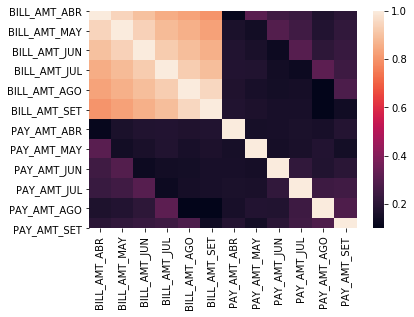

In [19]:
sn.heatmap(creditv4.corr())

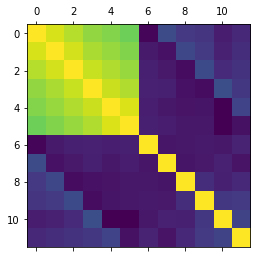

In [16]:
plt.matshow(creditv4.corr())

In [27]:
# Another attempt to correlate more columns
creditv5 = creditv3[['LIMIT_BAL' , 'SEX' , 'EDUCATION' , 'MARRIAGE' , 'AGE' , 
'PAY_STATUS_ABR' , 'PAY_STATUS_MAY', 'PAY_STATUS_JUN' , 'PAY_STATUS_JUL' , 'PAY_STATUS_AGO' , 'PAY_STATUS_SEP' ,
'BILL_AMT_ABR' , 'BILL_AMT_MAY' , 'BILL_AMT_JUN' , 'BILL_AMT_JUL' , 'BILL_AMT_AGO' , 'BILL_AMT_SET' ,
'PAY_AMT_ABR' , 'PAY_AMT_MAY' , 'PAY_AMT_JUN' , 'PAY_AMT_JUL' , 'PAY_AMT_AGO' , 'PAY_AMT_SET', 'default payment next month']]

In [28]:
for col in creditv5.columns: 
    print(col) 

LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_STATUS_ABR
PAY_STATUS_MAY
PAY_STATUS_JUN
PAY_STATUS_JUL
PAY_STATUS_AGO
PAY_STATUS_SEP
BILL_AMT_ABR
BILL_AMT_MAY
BILL_AMT_JUN
BILL_AMT_JUL
BILL_AMT_AGO
BILL_AMT_SET
PAY_AMT_ABR
PAY_AMT_MAY
PAY_AMT_JUN
PAY_AMT_JUL
PAY_AMT_AGO
PAY_AMT_SET
default payment next month


In [29]:
creditv5.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,PAY_STATUS_AGO,...,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.235195,-0.249411,-0.267460,-0.286123,-0.296382,...,0.283236,0.278314,0.285430,0.219595,0.217202,0.203242,0.210167,0.178408,0.195236,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.044008,-0.055064,-0.060173,-0.066096,-0.070771,...,-0.024563,-0.031183,-0.033642,-0.002766,-0.001667,-0.002229,-0.008597,-0.001391,-0.000242,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.082316,0.097520,0.108793,0.114025,0.121566,...,0.013002,0.018749,0.023581,-0.037200,-0.040358,-0.038218,-0.039943,-0.030038,-0.037456,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.034345,0.035629,0.033122,0.032688,0.024199,...,-0.024909,-0.021602,-0.023472,-0.006641,-0.001205,-0.012659,-0.003541,-0.008093,-0.005979,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.048773,-0.053826,-0.049722,-0.053048,-0.050148,...,0.053710,0.054283,0.056239,0.019478,0.022850,0.021379,0.029247,0.021785,0.026147,0.013890
PAY_STATUS_ABR,-0.235195,-0.044008,0.082316,0.034345,-0.048773,1.000000,0.816900,0.716449,0.632684,0.575501,...,0.241181,0.226924,0.207373,-0.025299,-0.046434,0.019018,0.005834,-0.005223,-0.001496,0.186866
PAY_STATUS_MAY,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.816900,1.000000,0.819835,0.686775,0.622780,...,0.243335,0.226913,0.206684,-0.023027,-0.033337,-0.058299,0.009062,-0.003191,-0.006089,0.204149
PAY_STATUS_JUN,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.716449,0.819835,1.000000,0.777359,0.662067,...,0.244983,0.225816,0.202812,-0.026565,-0.033590,-0.043461,-0.069235,-0.001944,-0.009362,0.216614
PAY_STATUS_JUL,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.632684,0.686775,0.777359,1.000000,0.766552,...,0.227494,0.237295,0.208473,-0.035861,-0.035863,-0.046067,-0.053311,-0.066793,0.001295,0.235253
PAY_STATUS_AGO,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.575501,0.622780,0.662067,0.766552,1.000000,...,0.224146,0.235257,0.234887,-0.036500,-0.037093,-0.046858,-0.055901,-0.058990,-0.080701,0.263551


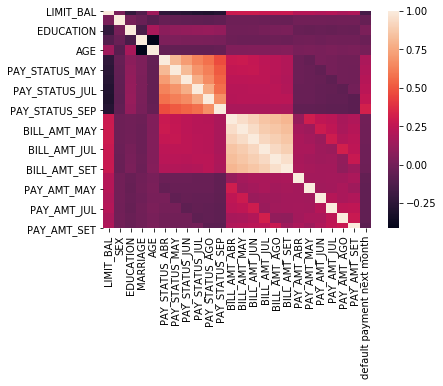

In [30]:
sn.heatmap(creditv5.corr())

# highly correlated variables are Payment status and Bill amount, max corr is approx 0.95
# there are no sign of overfiting 
# Keppimg following columns for CORR MATRIX
# PAY_STATUS_ABR
# PAY_STATUS_MAY
# PAY_STATUS_JUN
# PAY_STATUS_JUL
# PAY_STATUS_AGO
# PAY_STATUS_SEP
# BILL_AMT_ABR
# BILL_AMT_MAY
# BILL_AMT_JUN
# BILL_AMT_JUL
# BILL_AMT_AGO
# BILL_AMT_SET



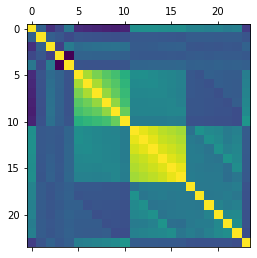

In [31]:
plt.matshow(creditv5.corr())

In [32]:
# THIS IS MY CORRELATION MATRIZ --> creditCORR

# In case predictions are not accurate, lets try with BILL AMOUNT only


creditCORR = creditv5[['PAY_STATUS_ABR' , 'PAY_STATUS_MAY', 'PAY_STATUS_JUN' , 'PAY_STATUS_JUL' , 'PAY_STATUS_AGO' , 'PAY_STATUS_SEP' ,
'BILL_AMT_ABR' , 'BILL_AMT_MAY' , 'BILL_AMT_JUN' , 'BILL_AMT_JUL' , 'BILL_AMT_AGO' , 'BILL_AMT_SET']]

for col in creditCORR.columns: 
    print(col) 

PAY_STATUS_ABR
PAY_STATUS_MAY
PAY_STATUS_JUN
PAY_STATUS_JUL
PAY_STATUS_AGO
PAY_STATUS_SEP
BILL_AMT_ABR
BILL_AMT_MAY
BILL_AMT_JUN
BILL_AMT_JUL
BILL_AMT_AGO
BILL_AMT_SET


In [56]:
# Save Correlation Matrix
creditCORR.to_csv(r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\creditCORR.csv')

In [ ]:
# Perform Exploratory Data Analysis 
# Visualizing the data 

In [33]:
# Histograms --> dataset creditv3 is full complete with all columns and ordered 
header = creditv3.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_ABR', 'PAY_STATUS_MAY', 'PAY_STATUS_JUN', 'PAY_STATUS_JUL',
       'PAY_STATUS_AGO', 'PAY_STATUS_SEP', 'BILL_AMT_ABR', 'BILL_AMT_MAY',
       'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AGO', 'BILL_AMT_SET',
       'PAY_AMT_ABR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
       'PAY_AMT_AGO', 'PAY_AMT_SET', 'default payment next month'],
      dtype='object')


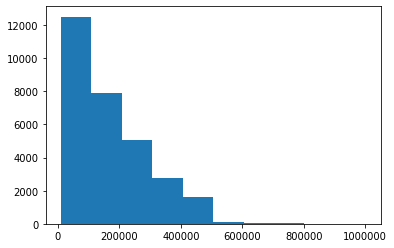

In [34]:
plt.hist(creditv3['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

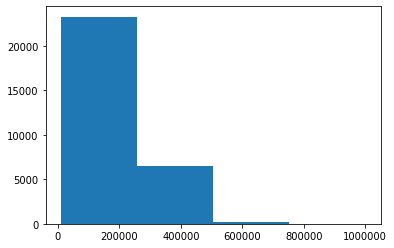

In [39]:
plt.hist(creditv3['LIMIT_BAL'], bins=4)

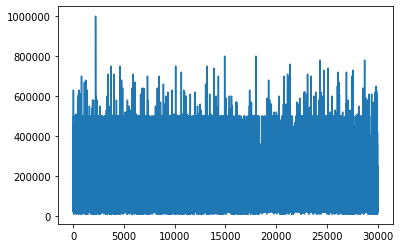

In [40]:
# This can be very important for things like preventing bias and model overfit and even identifying collinearity
plt.plot(creditv3['LIMIT_BAL'])
plt.show()

In [43]:
# Scatter plots 
# Scatter plots are very useful for comparing two features and understanding any possible relationships between the data
# Set the two features equal to variables

x = creditv3['PAY_STATUS_ABR']
y = creditv3['PAY_STATUS_MAY']

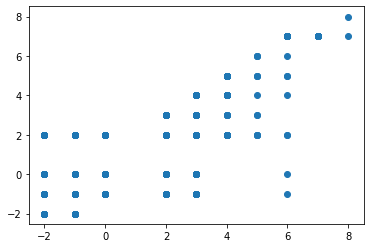

In [44]:
plt.scatter(x,y)
plt.show()

In [ ]:
# Box plotes
# To visualize where the bulk (abultar) of the data is in any given feature and also very useful for 
# identifying features with outliers or extreme variances in the observations

In [46]:
header = creditv3.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_ABR', 'PAY_STATUS_MAY', 'PAY_STATUS_JUN', 'PAY_STATUS_JUL',
       'PAY_STATUS_AGO', 'PAY_STATUS_SEP', 'BILL_AMT_ABR', 'BILL_AMT_MAY',
       'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AGO', 'BILL_AMT_SET',
       'PAY_AMT_ABR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
       'PAY_AMT_AGO', 'PAY_AMT_SET', 'default payment next month'],
      dtype='object')


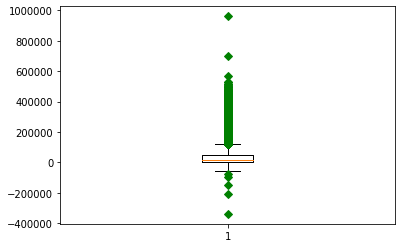

In [48]:
A = creditv3['BILL_AMT_ABR']
plt.boxplot(A,0,'gD')
plt.show()

In [49]:
# Correlation 
# addressing collinearity or checking for relationships between features for selection or engineering
# calculating correlation is vital part of all Data Science projects

corrMat = creditv3.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_STATUS_ABR             -0.020270  -0.235195 -0.044008   0.082316   
PAY_STATUS_MAY             -0.022199  -0.249411 -0.055064   0.097520   
PAY_STATUS_JUN             -0.002735  -0.267460 -0.060173   0.108793   
PAY_STATUS_JUL             -0.018494  -0.286123 -0.066096   0.114025   
PAY_STATUS_AGO             -0.011215  -0.296382 -0.070771   0.121566   
PAY_STATUS_SEP             -0.030575  -0.271214 -0.057643   0.105364   
BILL_AMT_ABR                0.016730   0.290389 -0.016733  -0.00

In [50]:
# Covariance
# You can use covariance to measure how changes in one variable are associated with changes in a second variable
# This will be very important when studying the impact various features might have on default rates
# Variance measures the variation of a single random variable (like the height of a person in a population)
# whereas covariance is a measure of how much two random variables vary together 
# (like the height of a person and the weight of a person in a population).

covMat = creditv3.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_STATUS_ABR             -2.018774e+02 -3.509308e+04    -0.024754   
PAY_STATUS_MAY             -2.178600e+02 -3.667056e+04    -0.030521   
PAY_STATUS_JUN             -2.769132e+01 -4.057181e+04    -0.034411   
PAY_STATUS_JUL             -1.916922e+02 -4.443225e+04    -0.038694   
PAY_STATUS_AGO             -1.162770e+02 -4.603765e+04    -0.041442   
PAY_STATUS_SEP             -2.975726e+02 -3.954593e+04    -0.031685   
BILL_AMT_ABR                8.628506e+06  2.243837e+09  -487.430160   
BILL_A

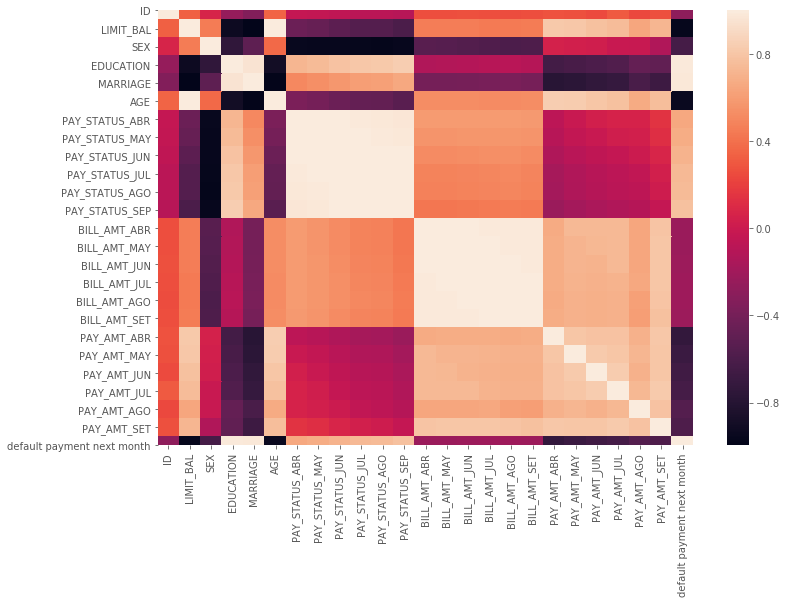

In [53]:
sn.heatmap(covMat.corr())

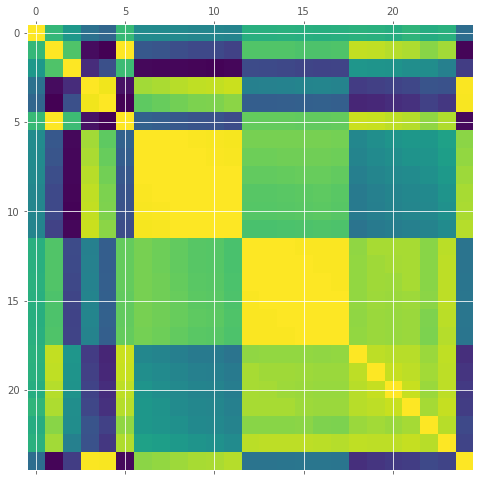

In [55]:
plt.matshow(covMat.corr())

In [57]:
# Save Covariance Matrix
covMat.to_csv(r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\covMat.csv')

In [ ]:
# Advanced Exploratory Analysis

# Define Variables

In [149]:
def ladderEducation(argument):
    switcher = {
        1: "Graduate School",
        2: "University",
        3: "High School",
        4: "Other"
    }
    return switcher.get(argument, "nothing")

In [150]:
def ladderGender(argument):
    switcher = {
         1: "Male",
         2: "Female"
    }
    return switcher.get(argument, "nothing")

In [151]:
def ladderMarital(argument):
    switcher = {
        1: "Married",
        2: "Single",
        3: "Divorce",
        4: "Other"
    }
    return switcher.get(argument, "nothing")

In [152]:
# Create gender dictionary 
Sex_dictionary ={1: 'Male', 2: 'Female'}

In [153]:
# Create marital dictionary 
Marital_dictionary ={1 : 'Married', 2 : 'Single' , 3: 'Divorce' , 0: 'Other'}

In [154]:
# Create education dictionary
Education_dictionary ={1 : 'Graduate School', 2 : 'University' , 3: 'High School' , 4: 'Other'}

In [155]:
# Create default payment dictionary
DefaultPaymentNextMonth_dictionary   = {1: 'Default', 0 : 'No Default'}

In [161]:
# Change SEX values in the dataset 
# For unknown reason column SEX from credit dataset stop working in below formula,
# hence called SEX column from other dataset "creditv2" 

creditv3['SEX'] = creditv2['SEX'].map(Sex_dictionary)

In [157]:
# Change MARRIAGE values in the dataset 
creditv3['MARRIAGE'] = credit['MARRIAGE'].map(Marital_dictionary)

In [158]:
# Change EDUCATION values in the dataset 
creditv3['EDUCATION'] = credit['EDUCATION'].map(Education_dictionary)

In [159]:
# Change DEFAULT values in the dataset 
creditv3['default payment next month'] = credit['default payment next month'].map(DefaultPaymentNextMonth_dictionary)

In [168]:
# There is no counter additional column
header = creditv3.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_ABR', 'PAY_STATUS_MAY', 'PAY_STATUS_JUN', 'PAY_STATUS_JUL',
       'PAY_STATUS_AGO', 'PAY_STATUS_SEP', 'BILL_AMT_ABR', 'BILL_AMT_MAY',
       'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AGO', 'BILL_AMT_SET',
       'PAY_AMT_ABR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
       'PAY_AMT_AGO', 'PAY_AMT_SET', 'default payment next month'],
      dtype='object')


In [169]:
#Print values
# There IS a counter additional column, staring count at "0"
print (creditv3)

          ID  LIMIT_BAL     SEX    EDUCATION MARRIAGE  AGE  PAY_STATUS_ABR  \
0          1      20000  Female   University  Married   24              -2   
1          2     120000  Female   University   Single   26               2   
2          3      90000  Female   University   Single   34               0   
3          4      50000  Female   University  Married   37               0   
4          5      50000    Male   University  Married   57               0   
...      ...        ...     ...          ...      ...  ...             ...   
29995  29996     220000    Male  High School  Married   39               0   
29996  29997     150000    Male  High School   Single   43               0   
29997  29998      30000    Male   University   Single   37               0   
29998  29999      80000    Male  High School  Married   41              -1   
29999  30000      50000    Male   University  Married   46               0   

       PAY_STATUS_MAY  PAY_STATUS_JUN  PAY_STATUS_JUL  ...  BIL

In [171]:
# Save the dataset
creditv3.to_csv(r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\creditv3.csv')

In [167]:
print (credit)

          ID  LIMIT_BAL     SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0          1      20000  Female          2         1   24      2      2   
1          2     120000  Female          2         2   26     -1      2   
2          3      90000  Female          2         2   34      0      0   
3          4      50000  Female          2         1   37      0      0   
4          5      50000    Male          2         1   57     -1      0   
...      ...        ...     ...        ...       ...  ...    ...    ...   
29995  29996     220000    Male          3         1   39      0      0   
29996  29997     150000    Male          3         2   43     -1     -1   
29997  29998      30000    Male          2         2   37      4      3   
29998  29999      80000    Male          3         1   41      1     -1   
29999  30000      50000    Male          2         1   46      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -

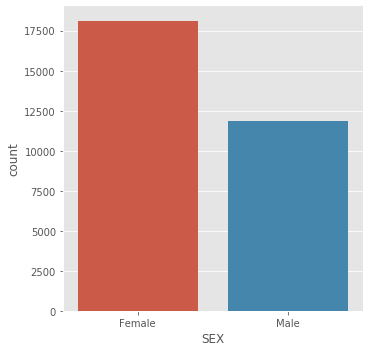

In [184]:
# Histograms Continue
sn.factorplot('SEX', data=creditv3, kind='count', aspect=1)

In [191]:
creditv3.groupby('SEX')['SEX'].count()

SEX
Female    18112
Male      11888
Name: SEX, dtype: int64

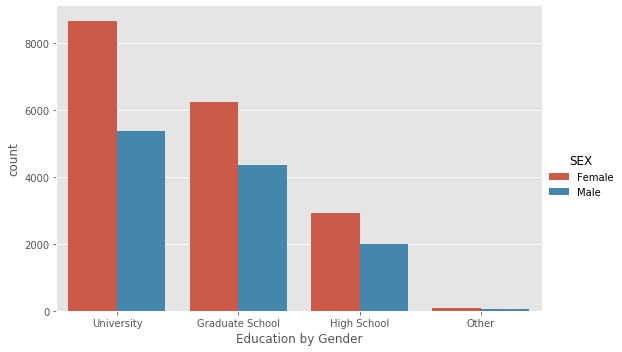

In [192]:
# Sex by Education 
g = sn.factorplot('EDUCATION', data=creditv3, hue='SEX', kind='count', aspect=1.5)
g.set_xlabels('Education by Gender')

In [193]:
creditv3.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION      
Female  Graduate School    6231
        High School        2927
        Other                81
        University         8656
Male    Graduate School    4354
        High School        1990
        Other                42
        University         5374
Name: SEX, dtype: int64

In [194]:
# Defaults by Sex 
creditv3.groupby('default payment next month')['default payment next month'].count()

default payment next month
Default        6636
No Default    23364
Name: default payment next month, dtype: int64

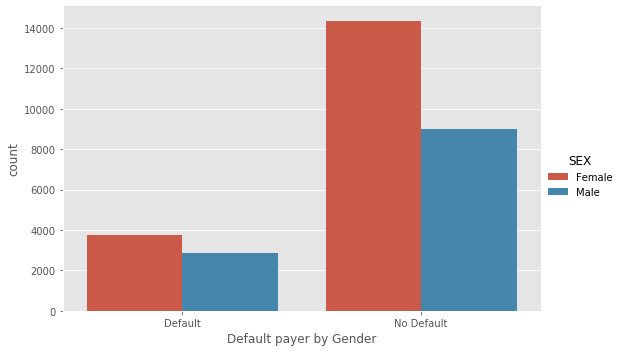

In [195]:
g = sn.factorplot('default payment next month', data=creditv3, hue='SEX', kind='count', aspect=1.5)
g.set_xlabels('Default payer by Gender')

In [196]:
# interesting fact: We know 60% of the credits are approved for Woman, then more Absolute defaulters are ladies (3763)
# however if we look at WOMEN default rate (3763/14349) = 26.2% vs MEN default rate (2873/9015)= 31.9% then MEN are
# worst payers than WOMEN by a 5%

creditv3.groupby(['SEX', 'default payment next month'])['SEX'].count()

SEX     default payment next month
Female  Default                        3763
        No Default                    14349
Male    Default                        2873
        No Default                     9015
Name: SEX, dtype: int64

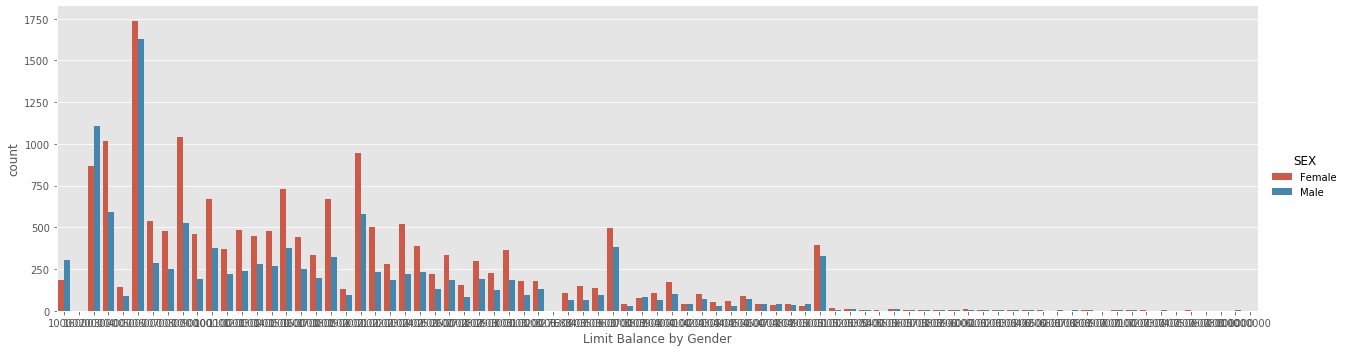

In [199]:
# Limit Balance by Sex 
# Women have higher limit balance but men are worst payers
g = sn.factorplot('LIMIT_BAL', data=creditv3, hue='SEX', kind='count', aspect=3.5)
g.set_xlabels('Limit Balance by Gender')

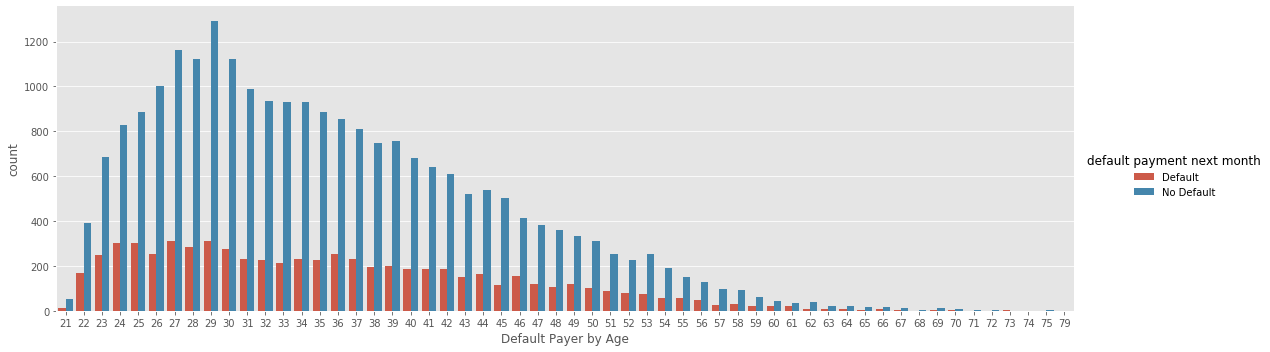

In [209]:
# Defaults by Age
# less effective payers are from 23 to 30 years old
g = sn.factorplot('AGE', data=creditv3, hue='default payment next month',kind='count', aspect=3)
g.set_xlabels('Default Payer by Age')

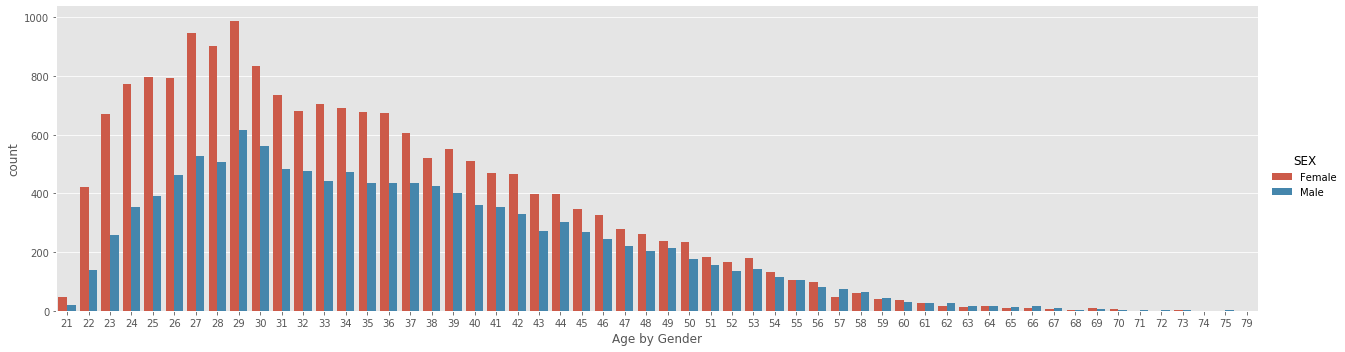

In [211]:
# Sex by Age 
g = sn.factorplot('AGE', data=creditv3, hue='SEX', kind='count', aspect=3.5)
g.set_xlabels('Age by Gender')

In [224]:

pd.set_option('display.max_rows', None)
creditv3.groupby(['SEX', 'AGE'])['SEX'].describe()


count unique     top freq
SEX    AGE                          
Female 21     46      1  Female   46
       22    421      1  Female  421
       23    671      1  Female  671
       24    772      1  Female  772
       25    796      1  Female  796
       26    792      1  Female  792
       27    948      1  Female  948
       28    903      1  Female  903
       29    988      1  Female  988
       30    834      1  Female  834
       31    734      1  Female  734
       32    682      1  Female  682
       33    704      1  Female  704
       34    690      1  Female  690
       35    677      1  Female  677
       36    673      1  Female  673
       37    606      1  Female  606
       38    520      1  Female  520
       39    553      1  Female  553
       40    511      1  Female  511
       41    471      1  Female  471
       42    465      1  Female  465
       43    397      1  Female  397
       44    398      1  Female  398
       45    348      1  Female  348
       46    326      1  Female  326
       47    279      1  Female  279
       48    261      1  Female  261
       49    237      1  Female  237
       50    236      1  Female  236
       51    184      1  Female  184
       52    167      1  Female  167
       53    181      1  Female  181
       54    131      1  Female  131
       55    105      1  Female  105
       56     98      1  Female   98
       57     47      1  Female   47
       58     59      1  Female   59
       59     41      1  Female   41
       60     37      1  Female   37
       61     28      1  Female   28
       62     17      1  Female   17
       63     13      1  Female   13
       64     15      1  Female   15
       65     10      1  Female   10
       66     10      1  Female   10
       67      7      1  Female    7
       68      2      1  Female    2
       69      9      1  Female    9
       70      6      1  Female    6
       71      1      1  Female    1
       72      1      1  Female    1
       73      2      1  Female    2
       74      1      1  Female    1
       75      1      1  Female    1
Male   21     21      1    Male   21
       22    139      1    Male  139
       23    260      1    Male  260
       24    355      1    Male  355
       25    390      1    Male  390
       26    464      1    Male  464
       27    529      1    Male  529
       28    506      1    Male  506
       29    617      1    Male  617
       30    561      1    Male  561
       31    483      1    Male  483
       32    476      1    Male  476
       33    442      1    Male  442
       34    472      1    Male  472
       35    436      1    Male  436
       36    435      1    Male  435
       37    435      1    Male  435
       38    424      1    Male  424
       39    401      1    Male  401
       40    359      1    Male  359
       41    353      1    Male  353
       42    329      1    Male  329
       43    273      1    Male  273
       44    302      1    Male  302
       45    269      1    Male  269
       46    244      1    Male  244
       47    222      1    Male  222
       48    205      1    Male  205
       49    215      1    Male  215
       50    175      1    Male  175
       51    156      1    Male  156
       52    137      1    Male  137
       53    144      1    Male  144
       54    116      1    Male  116
       55    104      1    Male  104
       56     80      1    Male   80
       57     75      1    Male   75
       58     63      1    Male   63
       59     42      1    Male   42
       60     30      1    Male   30
       61     28      1    Male   28
       62     27      1    Male   27
       63     18      1    Male   18
       64     16      1    Male   16
       65     14      1    Male   14
       66     15      1    Male   15
       67      9      1    Male    9
       68      3      1    Male    3
       69      6      1    Male    6
       70      4      1    Male    4
       71      2      1    Male    2
       72      

Text(0.5, 1.0, 'Distribution of Consumers Age')

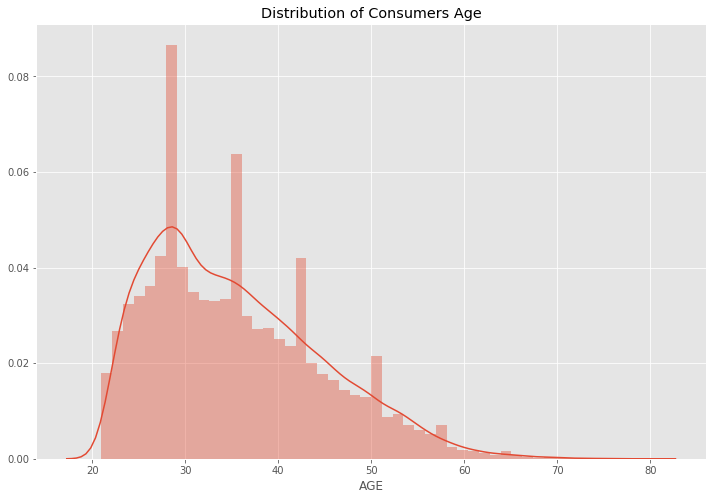

In [227]:
# 80% of consumers go from 21 to 42 years old 

# Distribution of age, with an overlay of a density plot
AGE = creditv3['AGE']
age_dist = sn.distplot(AGE)
age_dist.set_title("Distribution of Consumers Age")

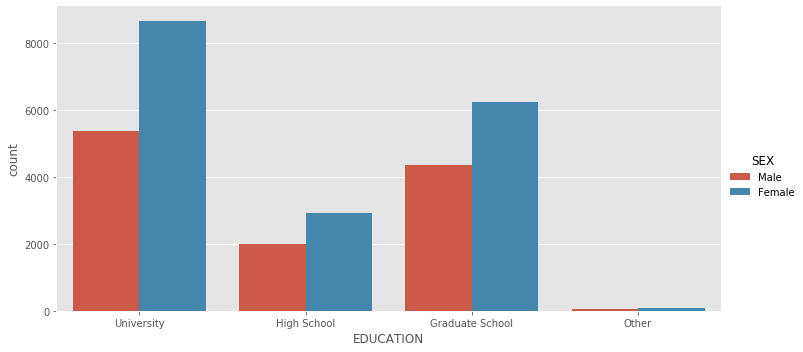

In [237]:
sn.factorplot('EDUCATION', data=creditv3, kind='count', hue='SEX',
              order=['University','High School','Graduate School','Other'], 
              hue_order=['Male','Female'], aspect=2)

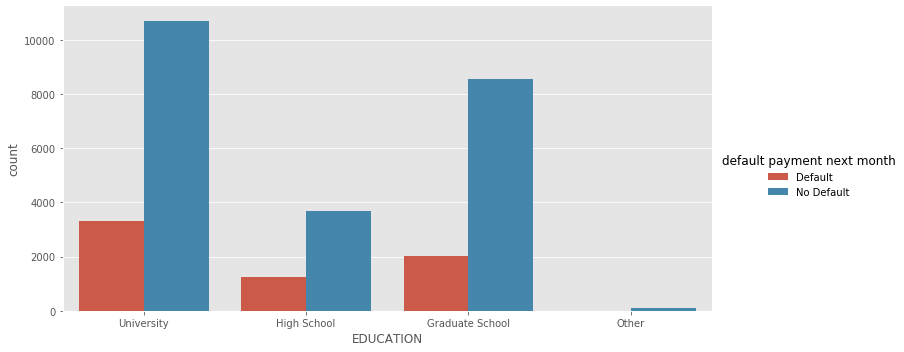

In [239]:
sn.factorplot('EDUCATION', data=creditv3, kind='count', hue='default payment next month',
              order=['University','High School','Graduate School','Other'], 
              hue_order=['Default','No Default'], aspect=2)

In [ ]:
# Focus on Universitary Men from 21 to 42 years old, this is where the most defaulter are present 